# Underfitting and Overfitting

In [1]:
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [2]:
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=26)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return mae

In [3]:
melbourne = pd.read_csv('melb_data.csv')
melbourne.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [4]:
filtered_melbourne = melbourne.dropna(axis=0)
main_features = ['Rooms', 'Bathroom', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude']

X = filtered_melbourne[main_features]
y = filtered_melbourne.Price

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=0)

Min mae is 241679.14 with 367 max_leaf_nodes
CPU times: total: 50 s
Wall time: 50 s


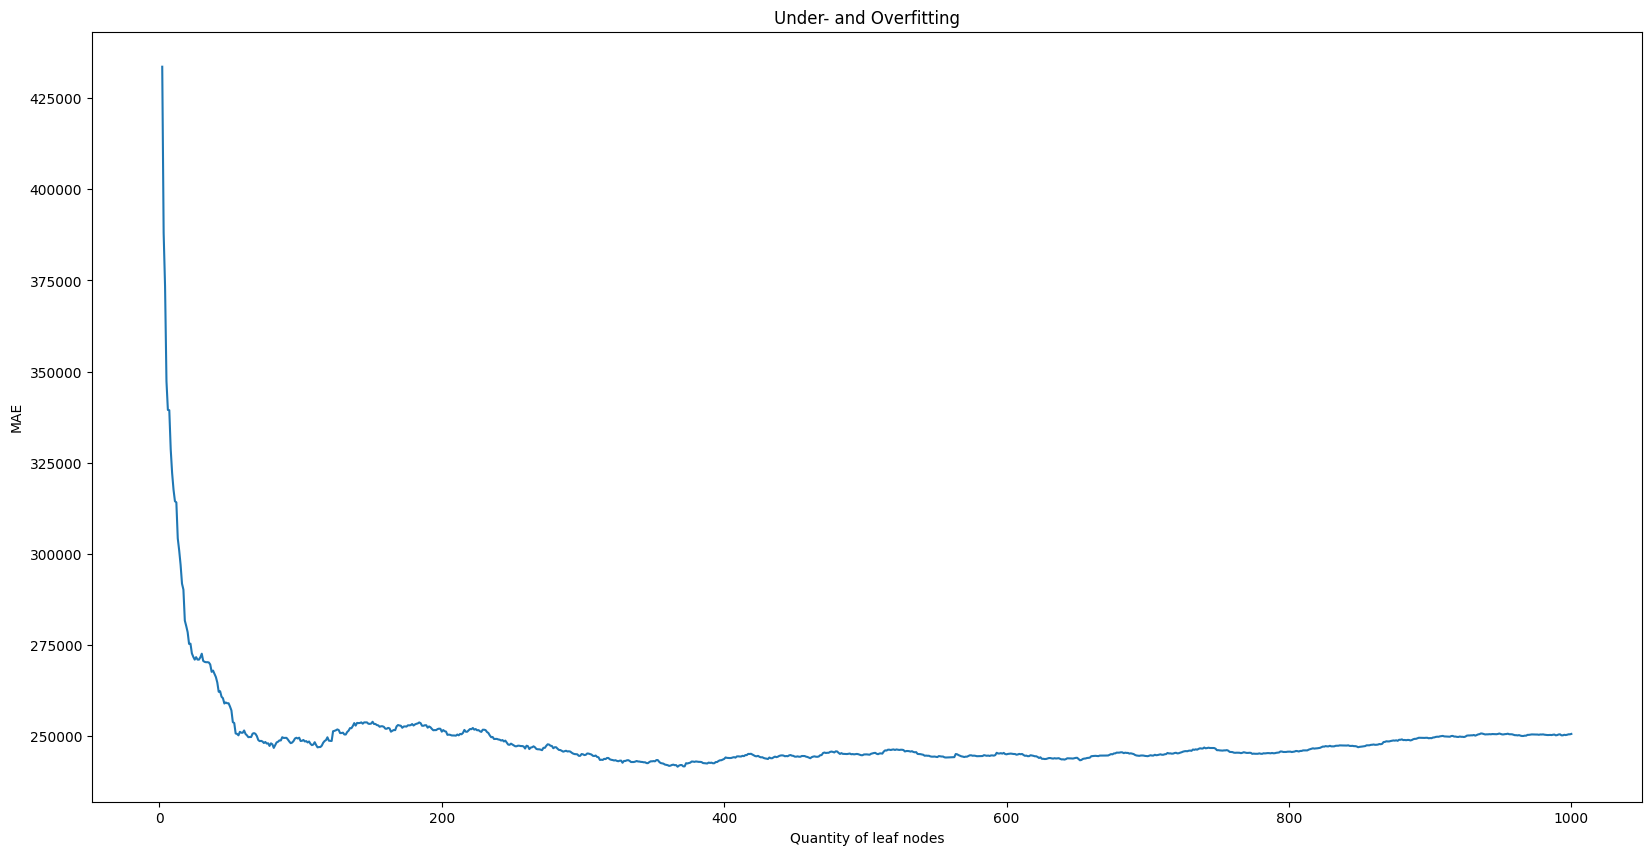

In [5]:
%%time
import matplotlib.pyplot as plt

max_leaf_nodes = list(range(2, 1001))
mae_results = []

for leafs in max_leaf_nodes:
    my_mae = get_mae(leafs, train_X, val_X, train_y, val_y)
    mae_results.append(my_mae)
    
plt.figure(figsize=(20, 10))
plt.plot(max_leaf_nodes, mae_results)
plt.xlabel('Quantity of leaf nodes')
plt.ylabel('MAE')
plt.title('Under- and Overfitting')

leaves_min_mae = max_leaf_nodes[mae_results.index(min(mae_results))]
print(f'Min mae is {min(mae_results):.2f} with {leaves_min_mae} max_leaf_nodes')

In [6]:
# Implement Randof Forest Regressor
from sklearn.ensemble import RandomForestRegressor

forest_model = RandomForestRegressor(random_state=26)
forest_model.fit(train_X, train_y)
melb_preds = forest_model.predict(val_X)
print(round(mean_absolute_error(y_true=val_y, y_pred=melb_preds), 2))

191098.59
